In [2]:
from fastai.vision.all import *

In [3]:
files = get_image_files('../input/dog-vs-cat-classification/train/train')

In [4]:
def label_func(f): return f.parent.name

In [5]:
dls = ImageDataLoaders.from_path_func('../input/dog-vs-cat-classification/train/train', files, label_func, item_tfms=Resize(224))

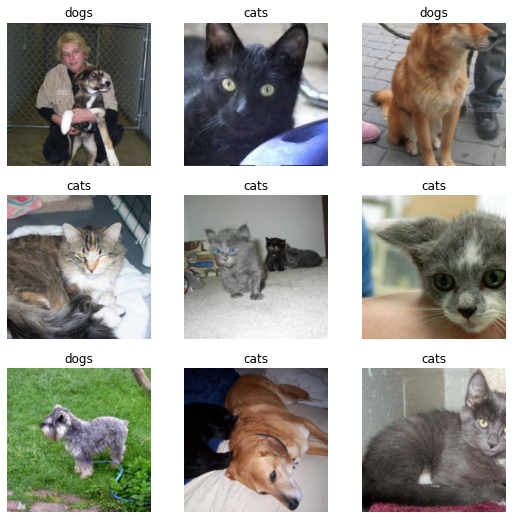

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.085852,0.047810,0.984400,02:45


epoch,train_loss,valid_loss,accuracy,time
0,0.040692,0.028724,0.990400,02:23


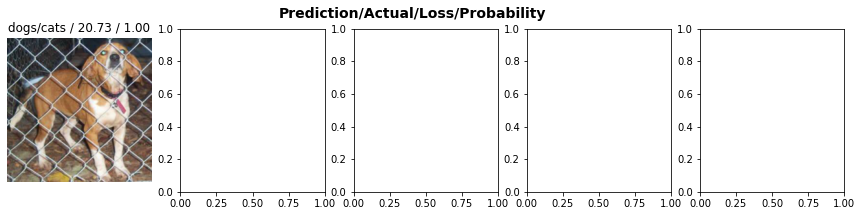

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1)